<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4001

# TAREA SEMANAL 0

Autor: Nicolás Burgos


### ENUNCIADO

Sea el siguiente circuito:

![alt text](circuito_ts0.png)

1. Obtener la función transferencia $H(s) = \frac{V2}{V1}$, en módulo y fase, con su respectivo diagrama de polos y ceros.

2. Proponga una norma de frecuencia e impedancia de forma tal de llenar a una *transferencia normalizada*.

3. Simule la *transferencia normalizada* en Python.

4. Simule la red en LTSpice y obtenga su respuesta en frecuencia.

5. ¿Qué tipo de filtro es? Analizar el caso del *MF-103* ¿Utiliza la misma red?

### RESOLUCIÓN

**1.** Si llamamos VX al nodo entre las resistencias R1 y R2, que por *CORTOCIRCUITO VIRTUAL* coincide con el nodo entre el capacitor C1 y la resistencia R3, podemos plantear las siguientes ecuaciones de nodos:

\begin{equation}
\frac{V1}{R1} + \frac{V2}{R2} - VX*(\frac{1}{R1} + \frac{1}{R2})= 0
\end{equation}

\begin{equation}
V1*sC1 - VX*(sC1 + \frac{1}{R3})= 0
\end{equation}

Despejando VX de la segunda ecuación, y efectuando su reemplazo en la primera, llegamos a la siguiente expresión de la función transferencia:

\begin{equation}
H(s) = \frac{V2}{V1} = \frac{s - \frac{R2}{C1R1R3}}{s + \frac{1}{C1R3}}
\end{equation}

Podemos inferir que este filtro podría ser un PASA-TODO, por lo que es necesario que $R1 = R2$. Además, se determina que $\omega_0 = \frac{1}{C1R3}$.

\begin{equation}
H(s) = \frac{V2}{V1} = \frac{s - \frac{1}{C1R3}}{s + \frac{1}{C1R3}} = \frac{s - \omega_0}{s + \omega_0}
\end{equation}

Si tenemos en cuenta que $s = j\omega$, entonces obtenemos las siguientes expreciones y gráficos:

\begin{equation}
H(j\omega) = \frac{j\omega - \omega_0}{j\omega + \omega_0}
\end{equation}

\begin{equation}
|H(j\omega)| = \frac{\sqrt{\omega_0^2 + \omega^2}}{\sqrt{\omega_0^2 + \omega^2}} = 1
\end{equation}

\begin{equation}
\theta(j\omega) = tg^{-1}(\frac{\omega}{-\omega_0}) - tg^{-1}(\frac{\omega}{\omega_0})
\end{equation}

![alt text](IMG_3816.jpg)

**2.** Para establecer la norma de frecuencia tendremos en cuenta que $\Omega_\omega = \omega_0 = \frac{1}{C1R3} = 1$

\begin{equation}
\Omega_\omega = \omega_0 = \frac{1}{C1R3} = 1
\end{equation}

De esta forma logramos que $C1 = \frac{1}{R3}$. Por otra parte, por conveniencia elegiremos $R1 = R2 = R3$, por lo que:

\begin{equation}
\Omega_Z = R3
\end{equation}

Así logramos la siguiente expresión de la función transferencia normalizada, junto con su red también normalizada:

\begin{equation}
H(s) = \frac{s - 1}{s + 1}
\end{equation}

![alt text](IMG_3817.jpg)

**3.** Ahora nos disponemos a realizar la simulación de la transferencia obtenida en el punto anterior.

In [ ]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
import scipy.signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, analyze_sys, pretty_print_lti

from matplotlib import pyplot as plt

In [ ]:
wo = 1

num = np.array([1, -wo**2]) 
den = np.array([1, wo**2])

H1 = sig.TransferFunction(num,den)
    
plt.close('all')
analyze_sys(H1, 'TS0')

plt.show()

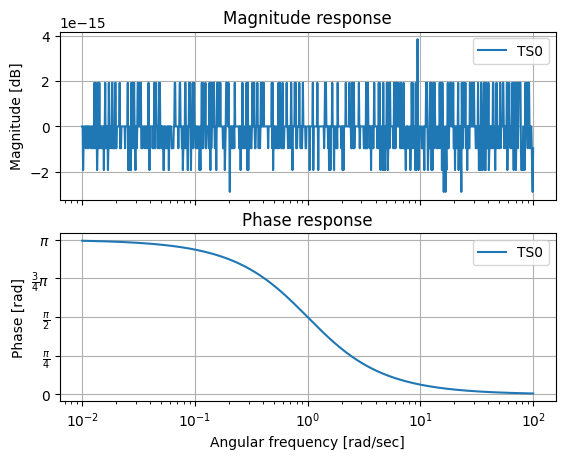

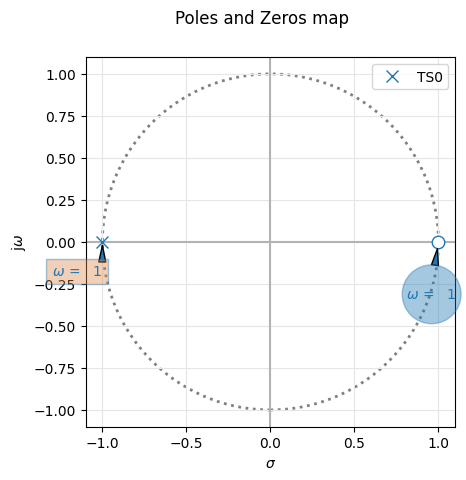

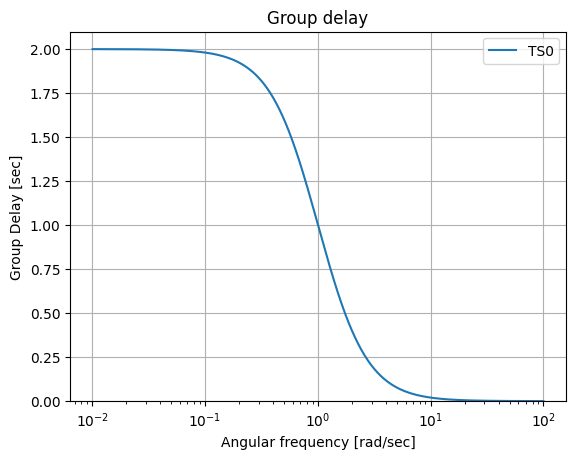

**4.** El circuito implementado en LTSpice, junto con su respuesta en frecuencia en módulo y fase son los siguientes:

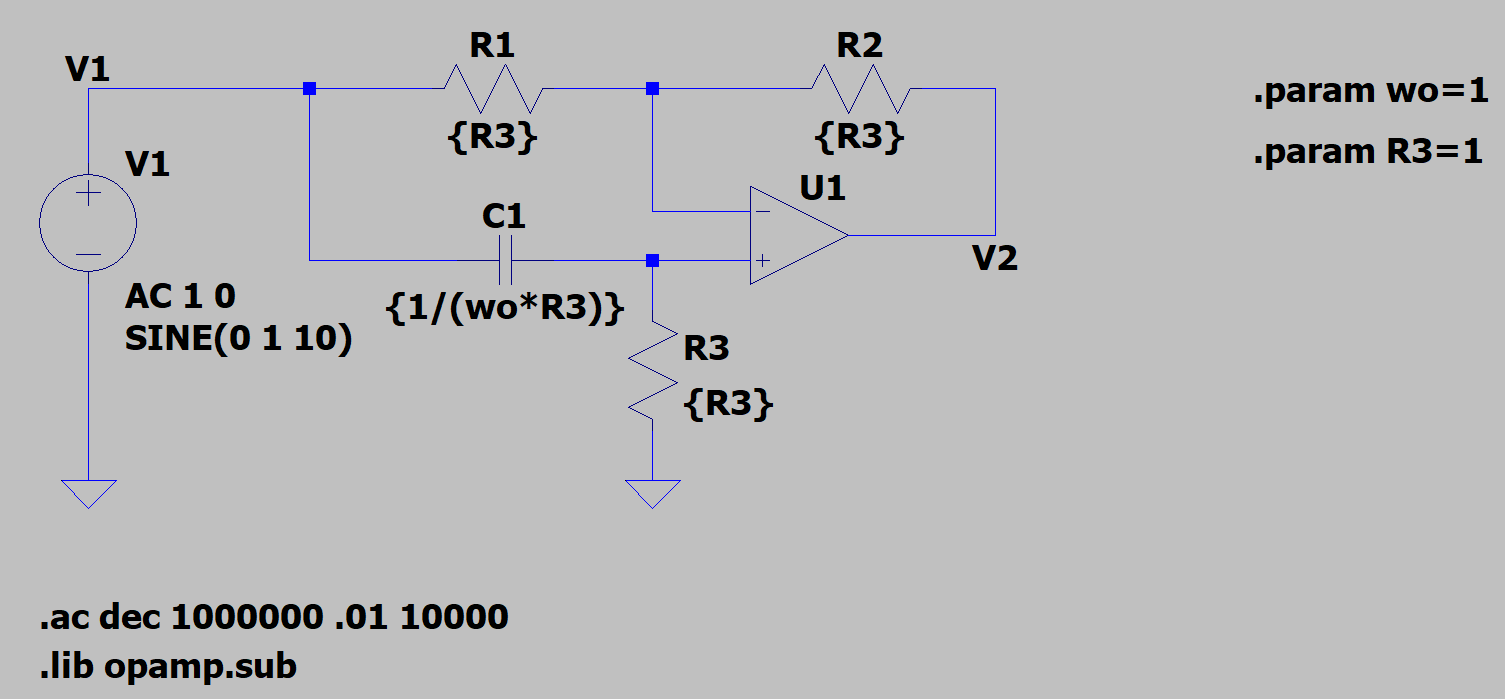

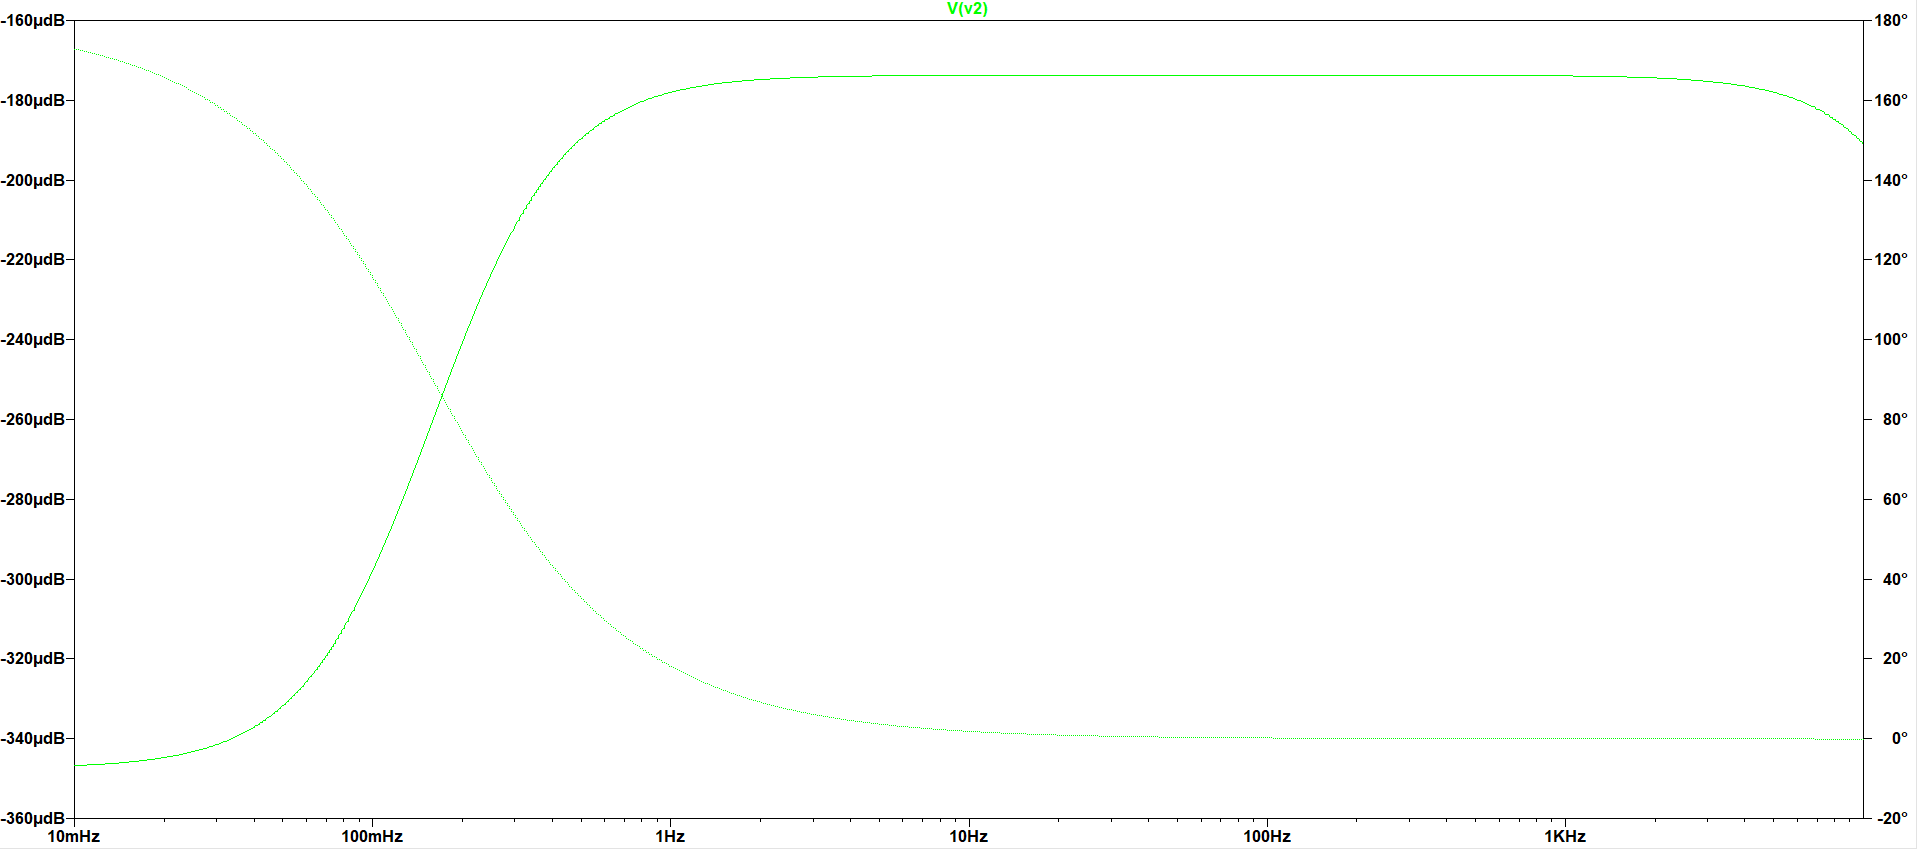

**5.** Luego de los análisis detallados, es de simple deducción que el filtro en cuestión es un **PASA-TODO**. Esto significa que al ingresar una señal en la entrada, el circuito la deja pasar, cambiando su fase. Es por eso que también se lo conoce como **CAMBIADOR DE FASE**.

En cuanto al caso del *MF-103*, se puede decir que la función de ambos circuitos son Cambiadores de Fase, pero la red empleada es diferente.